# Analyzing the Traffic Dataset

**Importing the Necessary Libraries**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
#Readind the CSV File
df=pd.read_csv('RTA Dataset.csv')

In [9]:
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [10]:
df.tail(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12306,17:10:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,1-2yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
12307,17:10:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Pick up upto 10Q,Governmental,Below 1yr,...,Moving Backward,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
12308,17:10:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (11?40Q),Owner,NaN,...,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
12309,9:05:00,Friday,31-50,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury
12310,9:05:00,Friday,18-30,Male,NaN,Employee,NaN,Special vehicle,Owner,Above 10yr,...,Reversing,Passenger,Male,Over 51,3,Employee,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [11]:
df.shape

(12316, 32)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [13]:
df.describe(include='all')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [14]:
df.duplicated().sum()

0

In [15]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Accident Severity')

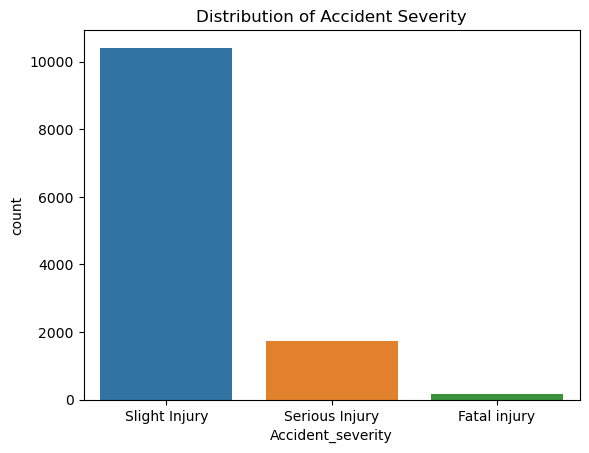

In [16]:
sns.countplot(x=df['Accident_severity'])
plt.title("Distribution of Accident Severity")

**Handling Missing Values**

In [17]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

<Axes: >

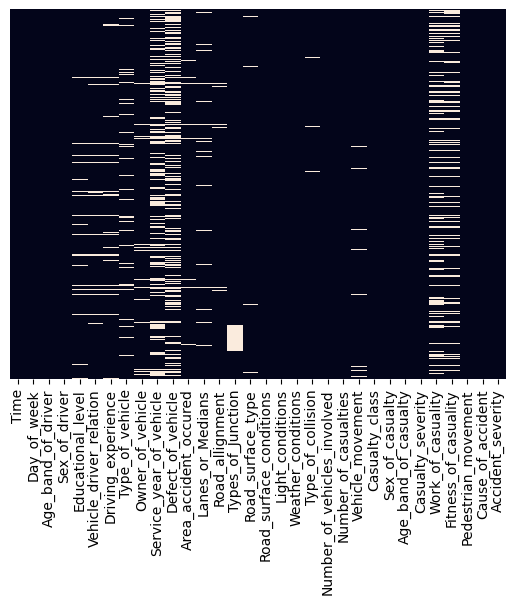

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [19]:
print("Dropping the Columns with the Missing Values Greater than 2500 and Time Column")

Dropping the Columns with the Missing Values Greater than 2500 and Time Column


In [20]:
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality','Fitness_of_casuality','Time'],axis=1,inplace=True)
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


<Axes: >

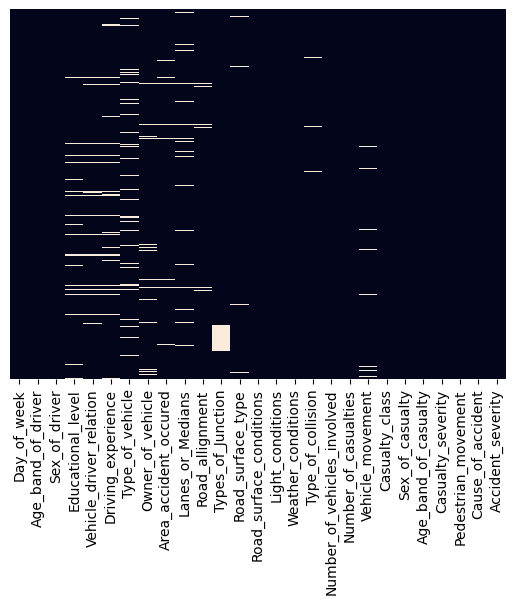

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [22]:
categorical=[i for i in df.columns if df[i].dtype=='O']
print("The Categorical Variables are:",categorical)

The Categorical Variables are: ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [23]:
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [24]:
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

<Axes: >

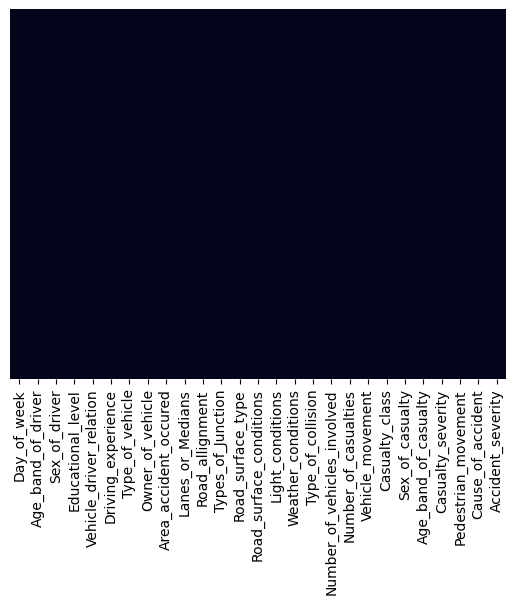

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [26]:
print("We can See now There are no Missing Values")

We can See now There are no Missing Values


# Visualization

**Scatter Plot**

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

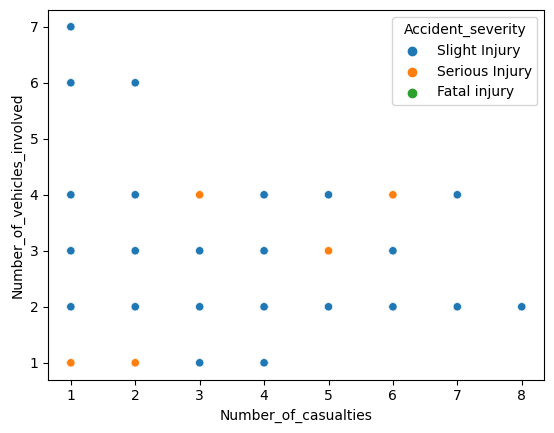

In [27]:
sns.scatterplot(x=df['Number_of_casualties'],y=df['Number_of_vehicles_involved'],hue=df['Accident_severity'])

In [28]:
print("There is no Visible Correlation Between Number of Casualties and the Number of Vehicles Involved columns")

There is no Visible Correlation Between Number of Casualties and the Number of Vehicles Involved columns


**Joint Plot**

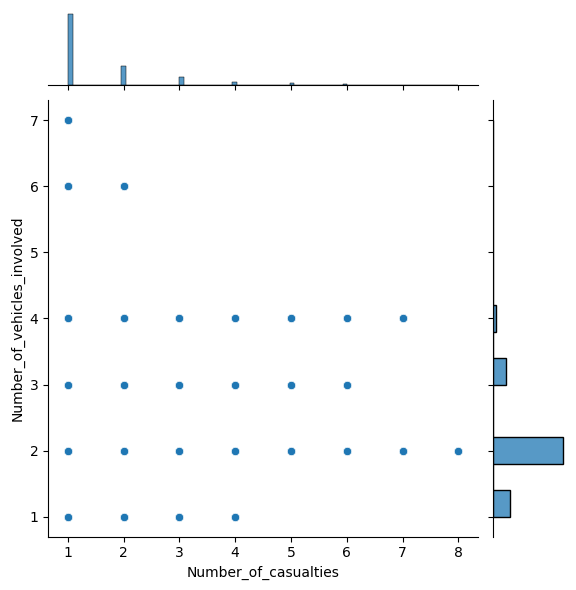

In [29]:
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=df)

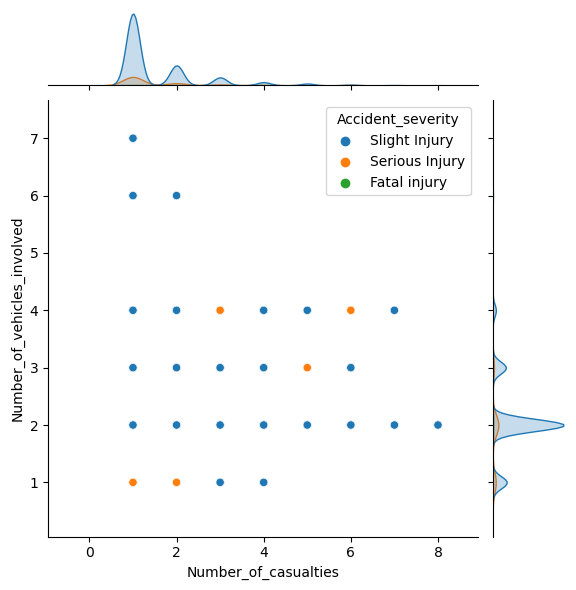

In [30]:
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=df,hue=df['Accident_severity'])

In [31]:
correlation = df['Number_of_casualties'].corr(df['Number_of_vehicles_involved'])
print("Correlation between Number_of_casualties and Number_of_vehicles_involved:", correlation)

Correlation between Number_of_casualties and Number_of_vehicles_involved: 0.2134268214548038


In [32]:
numerical=[i for i in df.columns if df[i].dtype!='O']
print("The Numerical Variables are:",numerical)

The Numerical Variables are: ['Number_of_vehicles_involved', 'Number_of_casualties']


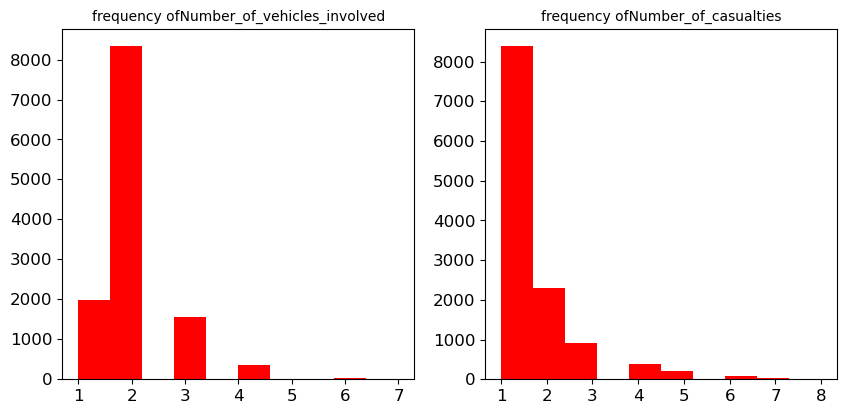

In [33]:
plt.figure(figsize=(10,10))
plotnumber=1
for i in numerical:
    if plotnumber<=df.shape[1]:
        ax1=plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of'+i,fontsize=10)
    plotnumber +=1

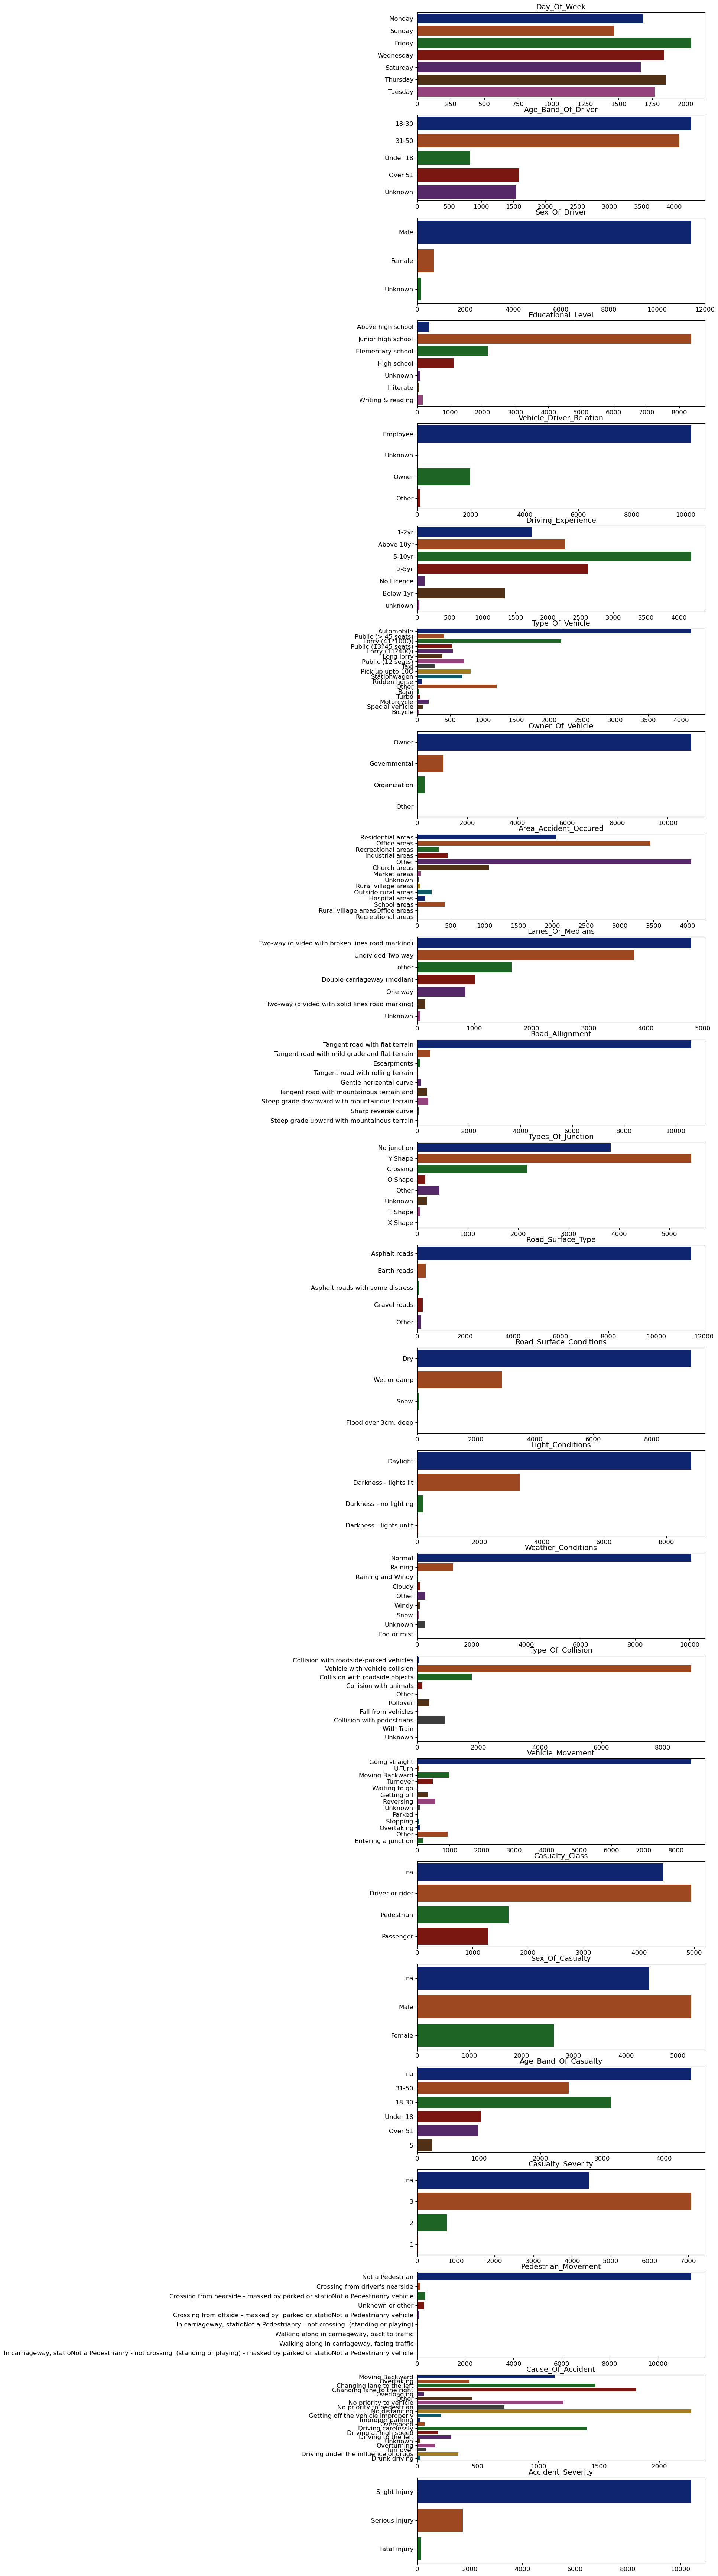

In [34]:
plt.figure(figsize=(10,100))
plotnumber=1
for col in categorical:
    if plotnumber<=df.shape[1] and col!='Pedestrain_movement':
        ax1=plt.subplot(28,1,plotnumber)
        sns.countplot(data=df,y=col,palette='dark')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(),fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1

# Handling the Categorical Values

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             12316 non-null  object
 8   Area_accident_occured        12316 non-null  object
 9   Lanes_or_Medians             12316 non-null  object
 10  Road_allignment              12316 non-null  object
 11  Types_of_Junction            12316 non-null  object
 12  Road_surface_type            12316 non-null  object
 13  Road_surface_conditions      12

In [36]:
print("Only Two Columns are of Integer Values")

Only Two Columns are of Integer Values


In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=pd.DataFrame() #Creating an Empty DataFrame
for i in categorical:
    if i!='Accident_severity':
        df1[i]=le.fit_transform(df[i])

In [38]:
df.shape

(12316, 27)

In [39]:
len(categorical)

25

In [40]:
df1.shape

(12316, 24)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              12316 non-null  int32
 1   Age_band_of_driver       12316 non-null  int32
 2   Sex_of_driver            12316 non-null  int32
 3   Educational_level        12316 non-null  int32
 4   Vehicle_driver_relation  12316 non-null  int32
 5   Driving_experience       12316 non-null  int32
 6   Type_of_vehicle          12316 non-null  int32
 7   Owner_of_vehicle         12316 non-null  int32
 8   Area_accident_occured    12316 non-null  int32
 9   Lanes_or_Medians         12316 non-null  int32
 10  Road_allignment          12316 non-null  int32
 11  Types_of_Junction        12316 non-null  int32
 12  Road_surface_type        12316 non-null  int32
 13  Road_surface_conditions  12316 non-null  int32
 14  Light_conditions         12316 non-null  int32
 15  We

<Axes: >

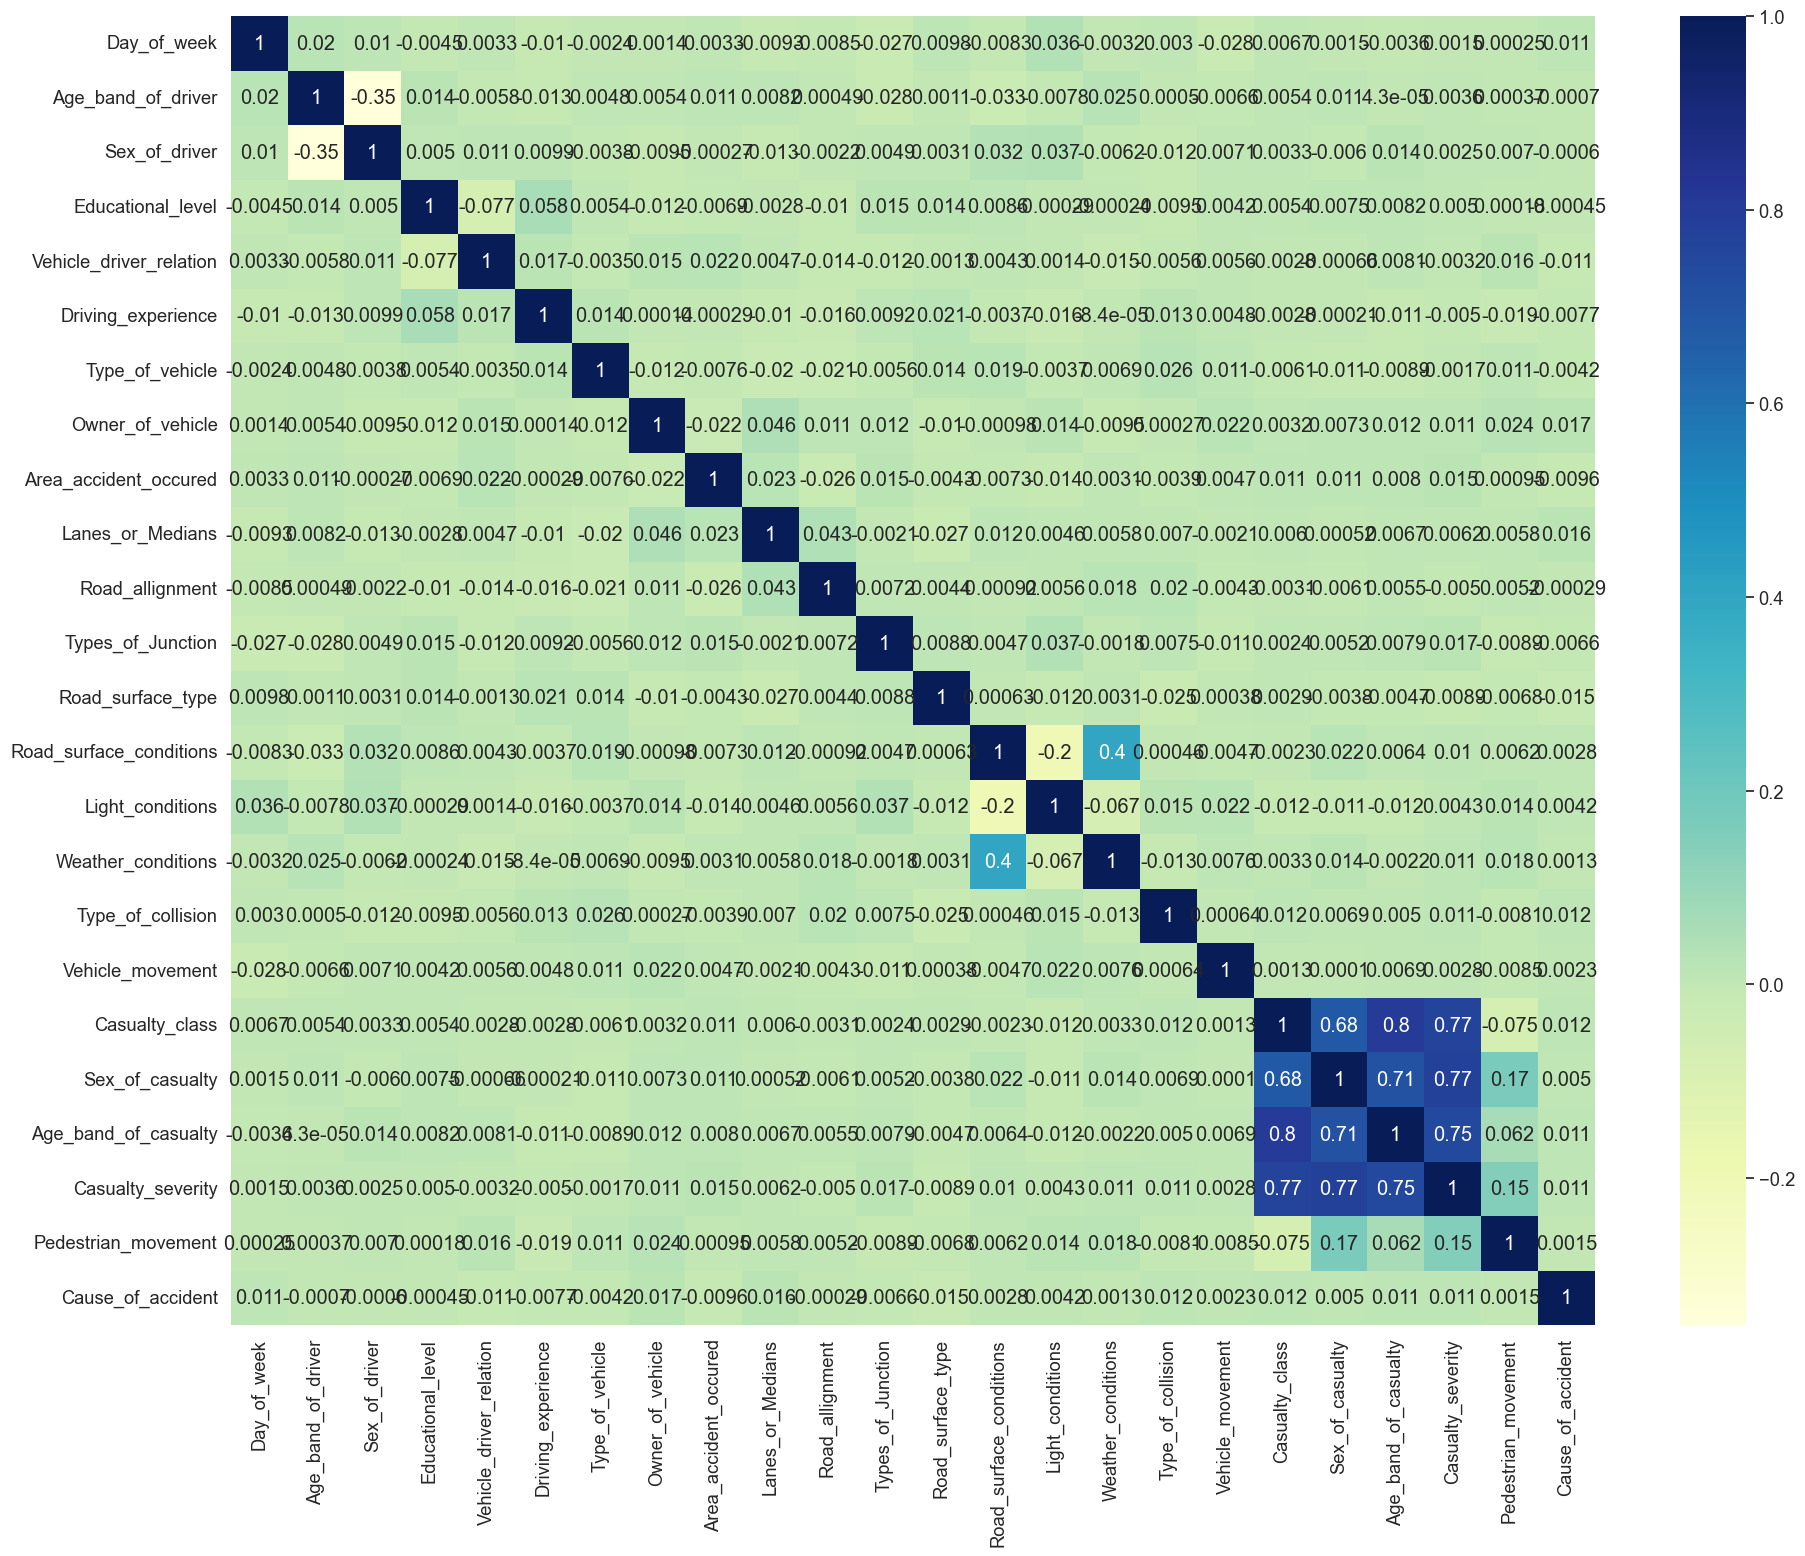

In [42]:
plt.figure(figsize=(22,17))
sns.set(font_scale=1.2)
sns.heatmap(df1.corr(),annot=True,cmap='YlGnBu')

In [43]:
df1.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,1,0,1,0,0,0,0,3,9,2,...,3,2,3,2,3,2,5,3,5,9
1,1,1,1,4,0,3,11,3,6,4,...,3,2,8,2,3,2,5,3,5,16
2,1,0,1,4,0,0,5,3,1,6,...,3,2,2,2,0,1,1,2,5,0
3,3,0,1,4,0,2,11,0,6,6,...,0,2,8,2,2,0,0,2,5,1
4,3,0,1,4,0,1,0,3,4,6,...,0,2,8,2,3,2,5,3,5,16


In [44]:
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,df['Accident_severity'])

In [45]:
f_p_values

(array([ 0.15822071,  8.91539214,  0.1431894 ,  0.17458477,  5.34534549,
         4.49967858,  1.07767124,  1.10426215,  3.61654037,  3.28161464,
         0.1319306 ,  3.08648691,  6.99480557,  0.61510308, 16.08282359,
         1.14934538, 10.09632283,  2.20071197,  3.2168602 ,  0.12594479,
        13.77841337,  0.20273788,  0.39747982,  3.19366551]),
 array([9.23937958e-01, 1.15890328e-02, 9.30908116e-01, 9.16409114e-01,
        6.90673790e-02, 1.05416165e-01, 5.83427189e-01, 5.75721597e-01,
        1.63937473e-01, 1.93823502e-01, 9.36163348e-01, 2.13686893e-01,
        3.02759144e-02, 7.35244973e-01, 3.21854237e-04, 5.62889079e-01,
        6.42112839e-03, 3.32752607e-01, 2.00201664e-01, 9.38969394e-01,
        1.01872169e-03, 9.03599597e-01, 8.19763078e-01, 2.02536988e-01]))

In [46]:
f_p_values1=pd.DataFrame({'features':df1.columns,'FScore':f_p_values[0],'Pvalues':f_p_values[1]})
f_p_values1

,features,FScore,Pvalues
0,Day_of_week,0.158221,0.923938
1,Age_band_of_driver,8.915392,0.011589
2,Sex_of_driver,0.143189,0.930908
3,Educational_level,0.174585,0.916409
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
6,Type_of_vehicle,1.077671,0.583427
7,Owner_of_vehicle,1.104262,0.575722
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824


In [47]:
f_p_values1.sort_values(by='Pvalues',ascending=True)

,features,FScore,Pvalues
14,Light_conditions,16.082824,0.000322
20,Age_band_of_casualty,13.778413,0.001019
16,Type_of_collision,10.096323,0.006421
1,Age_band_of_driver,8.915392,0.011589
12,Road_surface_type,6.994806,0.030276
4,Vehicle_driver_relation,5.345345,0.069067
5,Driving_experience,4.499679,0.105416
8,Area_accident_occured,3.616540,0.163937
9,Lanes_or_Medians,3.281615,0.193824
18,Casualty_class,3.216860,0.200202


In [48]:
df2=df.drop(['Owner_of_vehicle','Type_of_vehicle','Road_surface_conditions','Pedestrian_movement','Casualty_severity','Educational_level','Day_of_week','Sex_of_driver','Road_allignment','Sex_of_casualty'],axis=1)
df2.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Age_band_of_casualty,Cause_of_accident,Accident_severity
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,Moving Backward,Slight Injury
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,31-50,Changing lane to the left,Serious Injury
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,18-30,Changing lane to the right,Slight Injury
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,Overtaking,Slight Injury


In [49]:
df2.shape

(12316, 17)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age_band_of_driver           12316 non-null  object
 1   Vehicle_driver_relation      12316 non-null  object
 2   Driving_experience           12316 non-null  object
 3   Area_accident_occured        12316 non-null  object
 4   Lanes_or_Medians             12316 non-null  object
 5   Types_of_Junction            12316 non-null  object
 6   Road_surface_type            12316 non-null  object
 7   Light_conditions             12316 non-null  object
 8   Weather_conditions           12316 non-null  object
 9   Type_of_collision            12316 non-null  object
 10  Number_of_vehicles_involved  12316 non-null  int64 
 11  Number_of_casualties         12316 non-null  int64 
 12  Vehicle_movement             12316 non-null  object
 13  Casualty_class               12

In [51]:
categorical_new=[i for i in df2.columns if df2[i].dtype=='O']
print(categorical_new)

['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident', 'Accident_severity']


In [52]:
len(categorical_new)

15

In [53]:
for i in categorical_new:
    print(df2[i].value_counts())

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64
Vehicle_driver_relation
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: count, dtype: int64
Driving_experience
5-10yr        4192
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64
Area_accident_occured
Other                              4058
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas          

# One Hot Encoding

In [54]:
dummy=pd.get_dummies(df2[['Age_band_of_driver','Vehicle_driver_relation','Driving_experience','Area_accident_occured','Lanes_or_Medians','Types_of_Junction','Road_surface_type','Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement','Casualty_class','Age_band_of_casualty','Cause_of_accident']],drop_first=True).astype(int)
dummy.head()

,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
df3=pd.concat([df2,dummy],axis=1)
df3.head()

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,18-30,Employee,1-2yr,Residential areas,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,...,0,0,0,0,0,0,0,0,0,0
1,31-50,Employee,Above 10yr,Office areas,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,1,0,0,0
2,18-30,Employee,1-2yr,Recreational areas,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,...,0,0,0,0,0,0,0,0,0,0
3,18-30,Employee,5-10yr,Office areas,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,0,0,0,0
4,18-30,Employee,2-5yr,Industrial areas,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,...,0,0,0,0,0,0,1,0,0,0


In [56]:
df3.drop(['Age_band_of_driver','Vehicle_driver_relation','Driving_experience','Area_accident_occured','Lanes_or_Medians','Types_of_Junction','Road_surface_type','Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement','Casualty_class','Age_band_of_casualty','Cause_of_accident'],axis=1,inplace=True)
df3.head()

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,Slight Injury,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,Serious Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,Slight Injury,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Seperating the Independent and the Dependent Features

In [57]:
x=df3.drop(['Accident_severity'],axis=1)
x.shape

(12316, 104)

In [58]:
x.head()

,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [59]:
y=df3.iloc[:,2]
y.head()

0     Slight Injury
1     Slight Injury
2    Serious Injury
3     Slight Injury
4     Slight Injury
Name: Accident_severity, dtype: object

In [60]:
y.value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

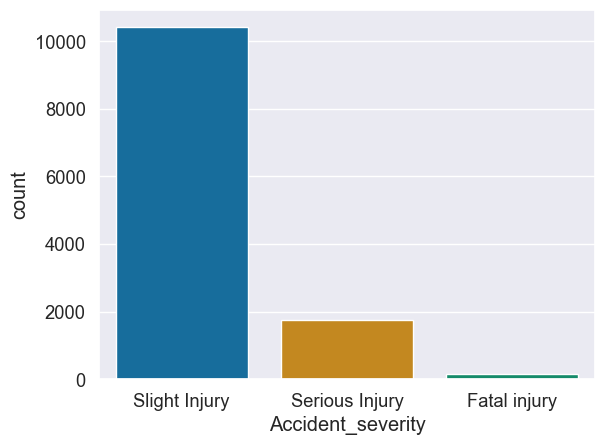

In [61]:
sns.countplot(x=y,palette='colorblind')

# Oversampling

In [62]:
import sklearn
print(sklearn.__version__)

1.5.2


In [63]:
!pip install --upgrade scikit-learn

In [64]:
!pip install scikit-learn

In [65]:
print(sklearn.__version__)

1.5.2


In [66]:
import time

start_time = time.time()
# Your code here
elapsed_time = time.time() - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.0 seconds


In [67]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)

In [69]:
y1=pd.DataFrame(yo)
y1.value_counts()

Accident_severity
Fatal injury         10415
Serious Injury       10415
Slight Injury        10415
Name: count, dtype: int64

<Axes: xlabel='Accident_severity', ylabel='count'>

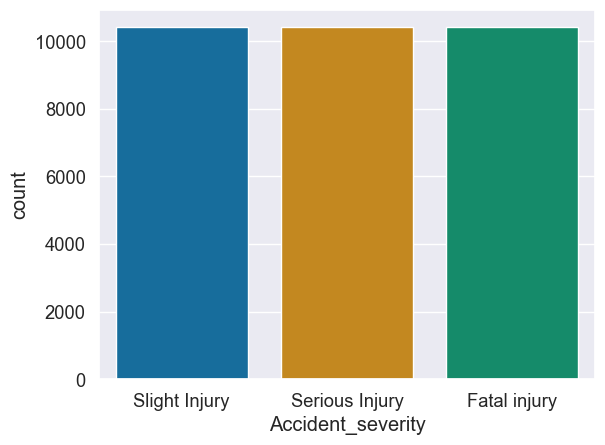

In [70]:
sns.countplot(x=yo,palette='colorblind')

# Splitting the Data into Training and the Test Data

In [73]:
xo

,Number_of_vehicles_involved,Number_of_casualties,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31240,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31241,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31242,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31243,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
yo

0         Slight Injury
1         Slight Injury
2        Serious Injury
3         Slight Injury
4         Slight Injury
              ...      
31240    Serious Injury
31241    Serious Injury
31242    Serious Injury
31243    Serious Injury
31244    Serious Injury
Name: Accident_severity, Length: 31245, dtype: object

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.30,random_state=42)

In [76]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(21871, 104) (9374, 104) (21871,) (9374,)


# KNN MODEL

**PREDICTION**

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [79]:
y_pred=model.predict(x_test)

In [80]:
y_pred

array(['Serious Injury', 'Serious Injury', 'Slight Injury', ...,
       'Fatal injury', 'Serious Injury', 'Serious Injury'], dtype=object)

**Checking for the Accuracy,Classification Report,Confusion Matrix**

In [87]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [88]:
Classification_report=classification_report(y_test,y_pred)
print(Classification_report)

                precision    recall  f1-score   support

  Fatal injury       0.79      1.00      0.88      3126
Serious Injury       0.64      0.90      0.75      3144
 Slight Injury       0.96      0.30      0.46      3104

      accuracy                           0.73      9374
     macro avg       0.80      0.73      0.69      9374
  weighted avg       0.80      0.73      0.70      9374



In [89]:
Accuracy=accuracy_score(y_test,y_pred)
print(Accuracy)

0.7340516321740985


Confusion Matrix:
 [[3124    2    0]
 [ 286 2824   34]
 [ 561 1610  933]]


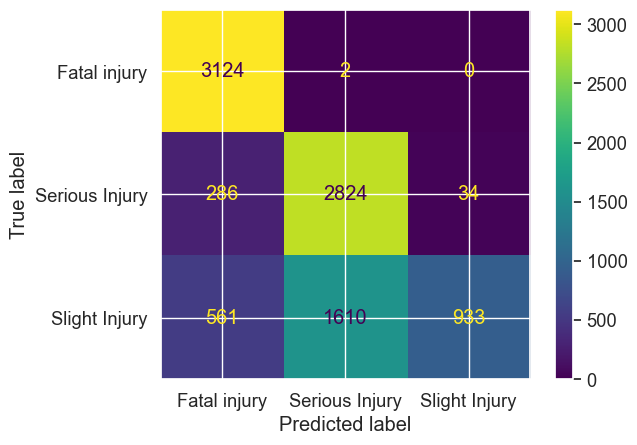

In [91]:
Confusion_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",Confusion_matrix)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))